# Rock  Scissor Paper ! Ex_1 

왜 PIL을 써야 하는가 ??

- 가위 바위 보 데이터 이미지 크기는 224 x 224 이지만, 프로젝트에서 요구하는것은 28x28 이기에, 사이즈를 줄이기 위함
- 사이즈를 줄이기 위해 PIL Library 함수를 사용 하는 것이다.

Glob 함수

- 파일의 리스트를 뽑을 때 사용하며, 아래의 resize_images 함수에서 jpg에 해당하는 데이터를 리스트로 images 변수에 저장.

In [1]:
from PIL import Image
import os, glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


# 1. 데이터 수집

- 데이터 만들기는 구글의 teachable machine 사이트를 통해 이미지를 쉽게 만들수 있다.
- 이미지의 사이즈는 224x224 사이즈 이지만 앞서 말한 것 처럼 PIL 함수를 통해 MNIST와 동일한 28x28로 사이즈를 변경해서 사용 

1-1 처음에는 다른 교육생들의 데이터를 취합하지 않고, 나만의 손사진으로 가위 바위 보 각각 1000장씩 촬영하였다.
   - 데이터 수집을 하면서 조금더 다양성을 확보하기 위해, 이미지 회전 및 연속 촬영
      
1-2 test 데이터셋으로는 교육생들의 데이터를 가위 바위 보 각각 100장씩 준비 하였다.

* 하지만 여기서 문제 발생 ! 

아래에도 설명을 하겠지만, train 데이터 정제가 필요 해보였다. 처음에 준비한 데이터는 뒤의 배경과 대상 object가 구분이 되기 힘들었는지,     
좋은 성능을 나타내지 못했다.

그래서 다시한번 복잡한 배경(패턴,색깔,모형)의 이미지를 모두 없앤, 흰색 배경에서 촬영한 이미지로 교체 

이후 교육생데이터를 취합하여 각각 3000장씩 총 9000장의 데이터를 수집 했다.

In [2]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [3]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")



3000  images to be resized.
3000  images resized.
가위 이미지 resize 완료!
3000  images to be resized.
3000  images resized.
바위 이미지 resize 완료!
3000  images to be resized.
3000  images resized.
보 이미지 resize 완료!


- 이후에 알게된 사실이 였지만, def 함수이기에.. 가위 바위 보 사이즈 변경시 각각 아래의 함수를 넣어줄 필요없이, 상단에 한번만 사용하면된다.

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")
    
- 굳이 .. 3번이나 작성할 필요가 없었던 함수..

# 1-2 데이터 전처리 : 병합, 변환, 불러오기

- 숫자 손글씨 이미지 분류기는 mnist.load_data() 라는 함수로 데이터를 불러왔다.
- 이와 같이, 가위 바위 보 데이터를 불러오는 load_data() 함수 만들기
- load_data()함수는 노드에 있는 코드 활용

라벨링시 가위:0, 바위:1, 보:2 로 라벨링 및 load_data() 함수를 통해 가위 바위 보 데이터를 불러옴

In [4]:
import numpy as np

def load_data(img_path, number_of_data=9000):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    
    return imgs, labels

다음과 같이 입력값인 x_train 데이터는 (데이터개수, 이미지 크기 x, 이미지 크기 y, 채널수) 형태로 생성되며,

컬러 이미지이기 때문에 R,G,B 값으로 표현되어 3개의 채널수가 생긴다.

- x_train -> 학습할 이미지 저장
- y_train -> 이미지 라벨 저장

In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 9000 입니다.
x_train shape: (9000, 28, 28, 3)
y_train shape: (9000,)


불러온 전체 데이터를 train set과 validation set, test set으로 나누자.
나누는 이유는 결론부터 말하자면 오버피팅 때문이다. 

현제 이글을 작성하기 전 10번의 모델을 가지고 여러가지 테스트를 진행 했었고,
최종적으로 EX.01 가위바위보 프로젝트는 오버피팅을 어떻게 잡느냐가 중요한 포인트 였다.

테스트 모델을 전부다 작성하기에는 너무 방대하기에 간략히 설명하겠다.
- 데이터 수집 및 사이즈 개선 , 드롭아웃 , Regularization , epoch 수정 , 배치정규화 등.. 이있었다. 

epoch 수정을 하면서 알게된 사실은 과적합 해결을 위한 수단이 아니라 모니터링의 수단이라는 것을 알게되었다.

- 순하게 epoch만 늘려주면 train data의 loss는 줄고 accuracy는 높아지기 때문에 train data의 loss와 accuracy는 valid 결과와 비교하기 위한 참고사항일 뿐이다. epoch 수를 늘리면 valid와 train loss가 교차하는 지점이 발생한다. 

- 일반적으로 valid loss가 감소하다가 증가하는 시점을 과적합으로 정의하기 때문에 이 지점에서 적당한 epoch을 결정한다. 이는 early stopping과도 관련이 있다. 

validation set은 학습이 이미 완료된 모델을 검증하기위한 dataset이다.

test set은 학습과 검증이 완료된 모델의 성능을 평가하기위한 dataset이다.

validation 참고글 ->  https://ganghee-lee.tistory.com/38 

In [6]:
def train_val_test_split(ds, ds_size, sd,train_split=0.6, val_split=0.2, test_split=0.2, shuffle=True):
    assert (train_split + test_split + val_split) == 1
    
    if shuffle:
        # trainning set, validation set, test set 을 동일하게 섞기 위해 seed 를 설정
        ds_shuffled = np.random.RandomState(seed=sd).permutation(ds)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds_shuffled[0:train_size]    
    val_ds = ds_shuffled[train_size:train_size+val_size]
    test_ds = ds_shuffled[train_size+val_size:]
    
    return train_ds, val_ds, test_ds

In [7]:
x_train_new, x_val_new, x_test_new = train_val_test_split(x_train,9000,42)
y_train_new, y_val_new, y_test_new = train_val_test_split(y_train,9000,42)

In [8]:
print(x_train_new.shape)
print(x_val_new.shape)
print(x_test_new.shape)

(5400, 28, 28, 3)
(1800, 28, 28, 3)
(1800, 28, 28, 3)


In [9]:
print(y_train_new.shape)
print(y_val_new.shape)
print(y_test_new.shape)

(5400,)
(1800,)
(1800,)


라벨:  0


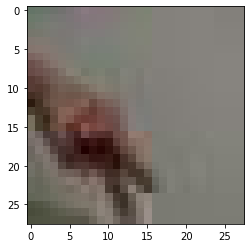

In [10]:
plt.imshow(x_test_new[0])
print('라벨: ', y_test_new[0])

라벨:  1


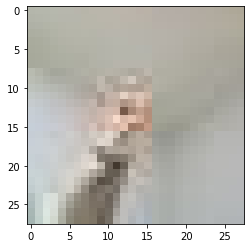

In [11]:
plt.imshow(x_val_new[0])
print('라벨: ', y_val_new[0])

라벨:  0


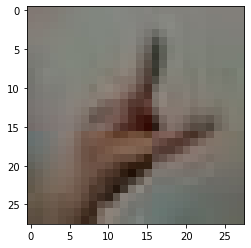

In [12]:
plt.imshow(x_train[500])
print('라벨: ', y_train[500])

- 이쯤에서 생기는 궁금증 !! 도대체 왜!? 이미지를 resize 하는 걸까?

28x28 알아보기 힘들정도로 분류하기 힘들다고 생각하는데, 왜 !? 

아무리 생각해도 이해가 되지않는다. 데이터 학습시간 단축때문에? 그해답은 모델성능을 향상시킨 프로젝트에서 설명하도록 하겠다.

# 2. 모델 설계 및 학습

tensorflow API를 이용해 가위바위보를 인식하는 딥러닝 모델을 설계 및 학습

하이퍼파라미터를 바꿔가면서 성능이 가장 좋은 모델을 찾고, 직접 여러 Layer를 쌓아서 모델 정의

Conv2D: 케라스에서 제공하는 Convolution 레이어로, 영상 처리에 주로 사용

오버피팅을 잡기위해 Dropout을 사용하였지만, 효과가 있는지는 잘 모르겠다. 

저 코딩이 제대로 적용이 됬는지, 저렇게 사용하는것이 맞는지 아직 100% 이해하지 못했다. 

In [89]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense


model=keras.models.Sequential()
model.add(keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(Dropout(0.2)) # 드롭아웃 추가. 비율은 20%
model.add(keras.layers.Dense(3, activation='softmax'))
model.add(Dropout(0.2)) # 드롭아웃 추가. 비율은 20%

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  9
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               1638656   
_________________________________________________________________
dropout_10 (Dropout)         (

딥러닝 학습
- optimizer는 학습에서 실제로 파라미터를 갱신시키는 부분을 의미
- adam(Adaptive Moment Estimation): 현재 가장 자주 사용되는 optimizer
- loss는 loss function을 의미
- sparse_categorical_crossentropy: 다중 분류 손실 함수



모델을 학습 시키기 전에 데이터를 0~1 사이의 값으로 정규화

In [48]:
x_train_new_norm = x_train_new / 255.0

In [90]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train_new_norm, y_train_new, epochs=13)

Epoch 1/13
169/169 [==============================] - 1s 5ms/step - loss: 3.3464 - accuracy: 0.4565
Epoch 2/13
169/169 [==============================] - 1s 4ms/step - loss: 2.8861 - accuracy: 0.6080
Epoch 3/13
169/169 [==============================] - 1s 4ms/step - loss: 2.1182 - accuracy: 0.6804
Epoch 4/13
169/169 [==============================] - 1s 4ms/step - loss: 1.6271 - accuracy: 0.7074
Epoch 5/13
169/169 [==============================] - 1s 4ms/step - loss: 1.3701 - accuracy: 0.7274
Epoch 6/13
169/169 [==============================] - 1s 4ms/step - loss: 0.9795 - accuracy: 0.7596
Epoch 7/13
169/169 [==============================] - 1s 4ms/step - loss: 0.9363 - accuracy: 0.7591
Epoch 8/13
169/169 [==============================] - 1s 4ms/step - loss: 0.7425 - accuracy: 0.7680
Epoch 9/13
169/169 [==============================] - 1s 4ms/step - loss: 0.5854 - accuracy: 0.7813
Epoch 10/13
169/169 [==============================] - 1s 4ms/step - loss: 0.5642 - accuracy: 0.7761

# Validation을 이용한 성능 평가

- Validation을 이용하여 성능평가를 실행하여, 오버피팅의 문제를 막고, 하이퍼파라미터를 조정 할 수 있다.

In [91]:
test_loss, test_accuracy = model.evaluate(x_val_new, y_val_new, verbose = 2)

print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

57/57 - 0s - loss: 3.4414 - accuracy: 0.7856
test_loss : 3.4414005279541016
test_accuracy : 0.7855555415153503


# Test data 준비

 - 이과정의 설명은 생략하겠다. Train Data 준비와 같기 때문이다.

In [79]:
# 테스트 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

# 테스트 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

# 테스트 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)


print("테스트 가위 이미지 resize 완료!")
print("테스트 바위 이미지 resize 완료!")
print("테스트 보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
200  images to be resized.
200  images resized.
200  images to be resized.
200  images resized.
테스트 가위 이미지 resize 완료!
테스트 바위 이미지 resize 완료!
테스트 보 이미지 resize 완료!


In [81]:
def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 600 입니다.
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


# Test 최종 모델 성능 평가

In [92]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

19/19 - 0s - loss: 2.7074 - accuracy: 0.7267
test_loss: 2.7074129581451416 
test_accuracy: 0.7266666889190674


# 어떤 데이터를 잘못 예측했는지 확인하자!

In [27]:
predicted_result = model.predict(x_test)  
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포: [1. 0. 0.]
라벨: 1, 예측결과: 0


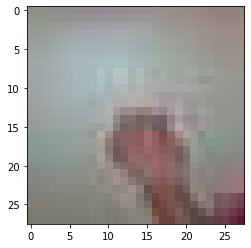

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


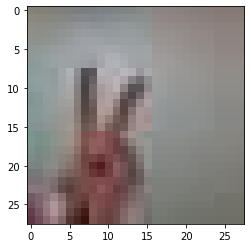

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


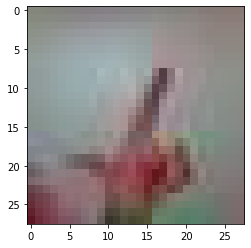

예측확률분포: [0. 0. 1.]
라벨: 1, 예측결과: 2


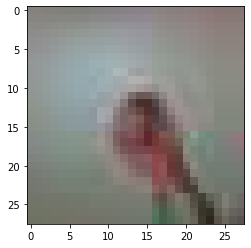

예측확률분포: [0. 0. 1.]
라벨: 0, 예측결과: 2


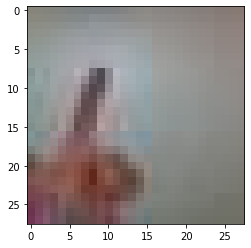

In [28]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모음
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑기
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 후기


- 여러번 시도를 하면서 에폭이 높다고 좋은것이 아니였다. 또한 훈련정확도가 높다고 테스트 정확도가 높은것도 아니였다.


- Ex01 가위바위보 모델을 만들면서, LMS에서 배운것만으로는 좋은 성능의 모델을 만들수가 없었다.
   - 정확도가 30% ~ 40% 더이상 벗어나지 않아서 매우매우 당황스러웠다.
   - 결과값을 향상 시키기위해, 데이터를 무작정 많이 셋업해보기도 했으며, 사이즈를 변경을 했고, 최종적으로 도달한 결과는 데이터의 다양성이였다. 
   - 결과값이 처음으로 70%를 달성했을때, 기분이 좋았지만 학습을 시키면 시킬수록 결과값이 큰폭으로 변동이 심했다..
  
- 이런내용들을 해결하기 위해서는 오버피팅을 공부해야 했으며, 처음에는 재미있었지만 깊이 파고들수록 현자타임이...
  
   - 오버피팅을 해결하기 위해서는 여러가지 방법이 있었다.
   
** 정확도를 높이기 위해서 시도했던 과정 **

- 복잡한 배경의 이미지나 평면상 구분이 어려운 이미지들을 삭제후 하얀색 배경의 이미지로 변경.
- train 데이터셋 증가 ( 300장 -> 1000장 -> 3000장 -> 6000장 -> 9000장 )
- train 데이터셋 사이즈 변경 ( 28x28 -> 112x112 -> 224x224 ) 
   - 224x224는 모델성능이 좋지않아서 구현할 수가없었다. 별도로 전이학습이라는 것을 통해야만 구현이 가능했다.
- 데이터 다양성을 위해 교육생들의 가위,바위,보 사진을 train set에 추가 !! 
- 모델 하이퍼피라미터 조정 

하지만 .. 결과값의 편차가 매우 심했기에 오버피팅 방지 및 epochs 최적화가 필요했다.

- train 데이터셋의 40%중 20%를 validation 데이터셋으로 , 나머지 20%는 test 데이터셋으로 세분화하여 활용
- 하이퍼파라미터 튜닝을 통해 validation 데이터셋에 활용하였고, 모델의 성능을 나타내는 지표들을 활용하여 더 나은 분류기를 만들기 위해 최적의 값을 찾으려고 했지만 실패..


더 높은 성능의 모델을 구현하기 위해 어떻게 해야할까??

- 드롭아웃 적용으로 결과값의 편차가 많이 줄었다. 처음에는 정확도가 70%였다가 40%로 급격하게 감소하였지만, 현재는 첫 학습시 정확도 72% ~ 최대 85%까지 결과값이 나타난다.

- validation을 통해 최적의 하이퍼파라미터를 찾아야하지만.. 지금 내가 진행한것들이 맞는것인지 틀린것인지 아직도 판단이 서지않는다..

어떻게하면 .. 90%이상의 정확도를 가진 성능의 모델을 구현할 수 있을까... 좀더 공부가 필요해보인다..


